In [38]:
import pandas as pd
from tqdm import tqdm
tqdm.pandas()
import matplotlib.pyplot as plt

from astropy.coordinates import SkyCoord
import astropy.units as u

In [17]:
combine_fold = 'C:/Users/oryan/Documents/mergers-in-cosmos/cats-to-combine'
data_folder = 'C:/Users/oryan/Documents/mergers-in-cosmos/data'

In [10]:
df_cat = pd.read_csv(f'{combine_fold}/dor-all-restaged-full.csv', index_col = 0)

C:\Users\oryan\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [14]:
df_cosmos = df_cat[['ORyanID_23', 'ALPHA_J2000', 'DELTA_J2000']]

In [20]:
int_df = pd.read_csv(f'{data_folder}/interacting-catalogue.csv', index_col = 0)
int_df.head()

,SourceID,RA,Dec,int_prediction,references,status
0,4000704963129,187.983807,58.010524,0.958096,No_entry,Unreferenced
1,4000704963271,187.980323,58.026481,0.966350,No_entry,Unreferenced
2,4000704963422,187.938181,58.039949,0.956150,No_entry,Unreferenced
3,4000705131622,217.216271,34.015278,0.987888,No_entry,Unreferenced
4,4000705131630,217.207839,34.015576,0.984174,No_entry,Unreferenced


In [25]:
df_merge = (
    df_cosmos
    .merge(int_df[['SourceID', 'RA', 'Dec']], left_on = 'ORyanID_23', right_on = 'SourceID', how = 'left')
    .dropna()
)

In [28]:
df_merge

,ORyanID_23,ALPHA_J2000,DELTA_J2000,SourceID,RA,Dec
0,4000705532455,150.679846,2.196543,4.000706e+12,150.679664,2.196615
1,4000705533383,150.644522,2.237226,4.000706e+12,150.645125,2.237650
2,4000705539941,149.702462,2.654895,4.000706e+12,149.702652,2.654624
3,4000705540034,149.726828,2.658172,4.000706e+12,149.727017,2.658066
4,4000705540064,149.701230,2.660343,4.000706e+12,149.701495,2.660271
...,...,...,...,...,...,...
3067,4000854480186,150.044314,2.288238,4.000854e+12,150.043148,2.289185
3068,4000858402222,150.310093,2.801374,4.000858e+12,150.309690,2.800710
3069,4000859156914,149.653540,2.173049,4.000859e+12,149.653857,2.172251
3070,4000859744431,150.234052,2.746578,4.000860e+12,150.235380,2.746410


In [34]:
def check_sep(cos_ra, cos_dec, ra, dec):
    cos_coord = SkyCoord(ra = cos_ra * u.deg, dec = cos_dec * u.deg, frame = 'fk5')
    int_coord = SkyCoord(ra = ra * u.deg, dec = dec * u.deg, frame = 'fk5')
    
    sep = (cos_coord.separation(int_coord)).to(u.arcsec)
    
    return float(sep / u.arcsec)

In [35]:
df_seps = (
    df_merge
    .assign(seps = df_merge.progress_apply(lambda row: check_sep(row.ALPHA_J2000, row.DELTA_J2000, row.RA, row.Dec), axis = 1))
)

100%|██████████| 3072/3072 [00:10<00:00, 287.94it/s]


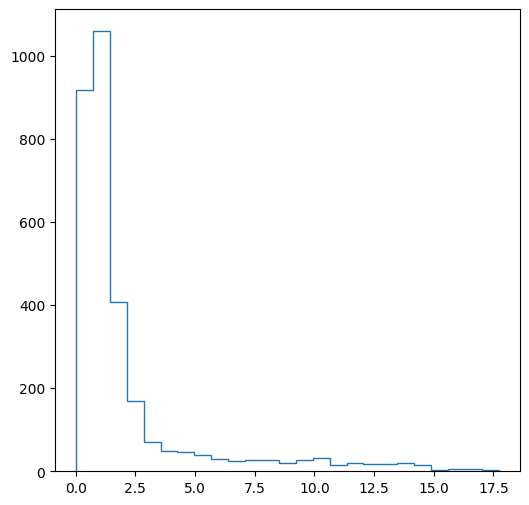

In [41]:
plt.figure(figsize = (6,6))
plt.hist(list(df_seps.seps), histtype = 'step', bins = 25)
plt.show()

In [45]:
df_seps.query('seps < 2.5')

,ORyanID_23,ALPHA_J2000,DELTA_J2000,SourceID,RA,Dec,seps
0,4000705532455,150.679846,2.196543,4.000706e+12,150.679664,2.196615,0.705448
2,4000705539941,149.702462,2.654895,4.000706e+12,149.702652,2.654624,1.193831
3,4000705540034,149.726828,2.658172,4.000706e+12,149.727017,2.658066,0.777141
4,4000705540064,149.701230,2.660343,4.000706e+12,149.701495,2.660271,0.987972
5,4000705540104,149.688716,2.661469,4.000706e+12,149.688878,2.661383,0.659336
...,...,...,...,...,...,...,...
3056,4000834976596,150.030173,1.989344,4.000835e+12,150.029771,1.989613,1.739171
3060,4000841548620,150.389266,1.596123,4.000842e+12,150.388970,1.596360,1.364330
3062,4000843580854,150.356667,2.551255,4.000844e+12,150.356202,2.550982,1.939866
3065,4000851084304,149.626199,2.797144,4.000851e+12,149.626089,2.796493,2.375909


In [44]:
df_seps.query('seps > 2.5')

,ORyanID_23,ALPHA_J2000,DELTA_J2000,SourceID,RA,Dec,seps
1,4000705533383,150.644522,2.237226,4.000706e+12,150.645125,2.237650,2.650799
7,4000705540519,149.696134,2.679032,4.000706e+12,149.696298,2.678262,2.831325
27,4000711823990,150.654138,2.808857,4.000712e+12,150.653304,2.809380,3.539755
29,4000711824415,150.674943,2.825172,4.000712e+12,150.676176,2.825507,4.595499
42,4000716471309,149.930099,1.910487,4.000716e+12,149.929946,1.909260,4.450476
...,...,...,...,...,...,...,...
3067,4000854480186,150.044314,2.288238,4.000854e+12,150.043148,2.289185,5.407148
3068,4000858402222,150.310093,2.801374,4.000858e+12,150.309690,2.800710,2.795698
3069,4000859156914,149.653540,2.173049,4.000859e+12,149.653857,2.172251,3.091069
3070,4000859744431,150.234052,2.746578,4.000860e+12,150.235380,2.746410,4.812425
